In [24]:
import torch
import torchvision 
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import Dataset
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from torchsummary import summary

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys

In [2]:
TF_cifar10 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((125.3/255, 123.0/255, 113.9/255), (63.0/255, 62.1/255.0, 66.7/255.0)),
])

trainset = torchvision.datasets.CIFAR10(root='/home/mydir/data', train=True, download=True, transform=TF_cifar10)
trainloaderIn = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=False)
testset = torchvision.datasets.CIFAR10(root='/home/mydir/data', train=False, download=True, transform=TF_cifar10)
testloaderIn = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [12]:
# When calling the pre-trained model, you maybe need the module in where pre-trained model's class is
# sys.path.insert(1, './odin/code')

path2model = './odin/models/'
dense10_cifar = torch.load(path2model+'densenet10.pth')
dense10_svhn = torch.load(path2model+'densenet10_svhn.pth')

In [4]:
testset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [30]:
type(testset[0][1])

int

# LittleLab: Let's reverse-engineer the paper `A Simple Unified Framework for Detecting Out-of-Distribution Samples and Adversarial Attacks`

In [5]:
# about non-deeplearning

# importing sys
import sys
# adding other folder to the system path
sys.path.insert(1, './Mahal')

In [6]:
# about deeplearning
import data_loader
import calculate_log as callog
import lib_generation


In [53]:
# the folder `models` includes the modules `densenet.py` and `resnet.py`, 
# so there must be the file `__init__py` in folder if you want to import the folder
import models 
model = torch.load('./models/densenet_cifar10_Mahal.pth')
num_classes = 10
train_loader = trainloaderIn

In [58]:
torch.cuda.manual_seed(1001)
out_dist_list = ['svhn', 'imagenet_resize', 'lsun_resize']
model.cuda()
train_loader, test_loader = trainloaderIn, testloaderIn
model.eval()
# ?? why we use tmp tensor?
temp_x = torch.rand(2,3,32,32).cuda()
temp_x = Variable(temp_x)
temp_list = model.feature_list(temp_x)[1] # last output is in index 0, intermediate ouputs are in index 1 (it is a list)
num_output = len(temp_list)
feature_list = np.empty(num_output)
count = 0
for out in temp_list:
    feature_list[count] = out.size(1)
    count += 1
    
sample_mean, precision = lib_generation.sample_estimator(model, num_classes, feature_list, train_loader)

./Mahal/lib_generation.py:69: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True)



 Training Accuracy:(100.00%)



In [63]:
sample_mean[1].shape

torch.Size([10, 108])

In [25]:
feature_list

array([ 24., 108., 150., 342.])

In [29]:
torch.randn(4,3,2).view(1,-1).s

torch.Size([1, 24])

In [44]:
t = torch.Tensor(range(120)).view(2, 3, 4, 5)
t

tensor([[[[  0.,   1.,   2.,   3.,   4.],
          [  5.,   6.,   7.,   8.,   9.],
          [ 10.,  11.,  12.,  13.,  14.],
          [ 15.,  16.,  17.,  18.,  19.]],

         [[ 20.,  21.,  22.,  23.,  24.],
          [ 25.,  26.,  27.,  28.,  29.],
          [ 30.,  31.,  32.,  33.,  34.],
          [ 35.,  36.,  37.,  38.,  39.]],

         [[ 40.,  41.,  42.,  43.,  44.],
          [ 45.,  46.,  47.,  48.,  49.],
          [ 50.,  51.,  52.,  53.,  54.],
          [ 55.,  56.,  57.,  58.,  59.]]],


        [[[ 60.,  61.,  62.,  63.,  64.],
          [ 65.,  66.,  67.,  68.,  69.],
          [ 70.,  71.,  72.,  73.,  74.],
          [ 75.,  76.,  77.,  78.,  79.]],

         [[ 80.,  81.,  82.,  83.,  84.],
          [ 85.,  86.,  87.,  88.,  89.],
          [ 90.,  91.,  92.,  93.,  94.],
          [ 95.,  96.,  97.,  98.,  99.]],

         [[100., 101., 102., 103., 104.],
          [105., 106., 107., 108., 109.],
          [110., 111., 112., 113., 114.],
          [115., 116.,

In [46]:
torch.mean(t, 2)

tensor([[[  7.5000,   8.5000,   9.5000,  10.5000,  11.5000],
         [ 27.5000,  28.5000,  29.5000,  30.5000,  31.5000],
         [ 47.5000,  48.5000,  49.5000,  50.5000,  51.5000]],

        [[ 67.5000,  68.5000,  69.5000,  70.5000,  71.5000],
         [ 87.5000,  88.5000,  89.5000,  90.5000,  91.5000],
         [107.5000, 108.5000, 109.5000, 110.5000, 111.5000]]])

In [50]:
t = t.view(t.size(0), t.size(1), -1)
t

tensor([[[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
           11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.],
         [ 20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,
           31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.],
         [ 40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,
           51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.]],

        [[ 60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,
           71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.],
         [ 80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
           91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.],
         [100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
          111., 112., 113., 114., 115., 116., 117., 118., 119.]]])

In [67]:
torch.mean(t, 2)[0].view(1,-1)

tensor([[ 9.5000, 29.5000, 49.5000]])

In [65]:
t[0]

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
         14., 15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33.,
         34., 35., 36., 37., 38., 39.],
        [40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
         54., 55., 56., 57., 58., 59.]])

In [70]:
torch.Tensor(range(12)).view(3, 4)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [71]:
torch.mean(torch.Tensor(range(12)).view(3, 4), 0)

tensor([4., 5., 6., 7.])

In [ ]:
# `lib_generation.py`
'''
real code in the main function

This function calculates the class means & precision. 
We should modify the function to calculate the class precisions.

sample_mean, precision = lib_generation.sample_estimator(model, args.num_classes, feature_list, train_loader)
'''

def sample_estimator(model, num_classes, feature_list, train_loader):
    """
    compute sample mean and precision (inverse of covariance)
    return: sample_class_mean: list of class mean
             precision: list of precisions
    """
    import sklearn.covariance
    
    model.eval()
    group_lasso = sklearn.covariance.EmpiricalCovariance(assume_centered=False)
    
    # `correct` is the number of correct inferences in entire inferences
    # `total` is ?????
    correct, total = 0, 0 
    
    num_output = len(feature_list)  # num output of model(last & intermediates)
    num_sample_per_class = np.empty(num_classes) # zeros of num classes(maybe will contain the class-wise means?)
    num_sample_per_class.fill(0)
    list_features = []
    for i in range(num_output):
        temp_list = []
        for j in range(num_classes): # temp_list contains zeros as many as the number of classes
            temp_list.append(0)
        list_features.append(temp_list) # list_features: double-nested list, #model output->#class
                                        # if num_output=4 & num_classes=10, then list_features:4x10 list
    
    for data, target in train_loader:
        total += data.size(0)
        data = data.cuda()
        data = Variable(data, volatile=True) # volatile=True -> only for inference
        output, out_features = model.feature_list(data) # output: last output, out_features: intermediate outputs
        
        # get hidden features
        for i in range(num_output):
                                                            # size(0): batch_size, size(1): tensor-depth?, -1: flatten
            out_features[i] = out_features[i].view(out_features[i].size(0), out_features[i].size(1), -1)
            out_features[i] = torch.mean(out_features[i].data, 2) # cal means with preserving the depth?
            
        # compute the accuracy
        pred = output.data.max(1)[1] # dim 1 in mini-batch -> each out for every input, [1] -> index
        equal_flag = pred.eq(target.cuda()).cpu() # the flags of correct prediction(1: correct, 0: incorrect)
        correct += equal_flag.sum() # the number of correct predictions
        
        # construct the sample matrix
        for i in range(data.size(0)): # batch_size -> consider outputs of each input
            label = target[i]  # the correct answer of each input
            if num_sample_per_class[label] == 0: # This case is that there is no output yet in the class
                out_count = 0
                for out in out_features:
                    list_features[out_count][label] = out[i].view(1, -1) # n개의 1차원-> 2차원 1xn
                    out_count += 1
            else:
                out_count = 0
                for out in out_features:
                    list_features[out_count][label] \
                    = torch.cat((list_features[out_count][label], out[i].view(1, -1)), 0)
                    out_count += 1                
            num_sample_per_class[label] += 1
            
    sample_class_mean = []
    out_count = 0
    for num_feature in feature_list:
        temp_list = torch.Tensor(num_classes, int(num_feature)).cuda() # temp_list: 10x24, 10x108, 10x150, 10x342
        for j in range(num_classes):                                   # j = 0,1,2,...,9 
            temp_list[j] = torch.mean(list_features[out_count][j], 0)  
        sample_class_mean.append(temp_list)
        out_count += 1
    # sample_class_mean contains 4 tensors for each intermediate layers which containing class means about output tensor of 1dim 
    precision = []
    for k in range(num_output):
        X = 0
        for i in range(num_classes):
            if i == 0:
                # k는 layer번호, i는 클래스 번호
                # list_features[k][i]는 2차원 tensor(해당클래스의 데이터 개수 x depth), 
                # sample_class_mean[k][i]는 1차원 tensor(depth개수) 
                # => Broadcasting
                X = list_features[k][i] - sample_class_mean[k][i]
            else:
                X = torch.cat((X, list_features[k][i] - sample_class_mean[k][i]), 0)
                
        # find inverse            
        group_lasso.fit(X.cpu().numpy())
        temp_precision = group_lasso.precision_ # pseudo-inverse matrix
        temp_precision = torch.from_numpy(temp_precision).float().cuda()
        precision.append(temp_precision)
        
    print('\n Training Accuracy:({:.2f}%)\n'.format(100. * correct / total))

    return sample_class_mean, precision

In [ ]:
# It is the code from `OOD_Generate_Mahalanobis.py`
from __future__ import print_function
import argparse
import torch
import data_loader
import numpy as np
import calculate_log as callog
import models
import os
import lib_generation

from torchvision import transforms
from torch.autograd import Variable

parser = argparse.ArgumentParser(description='PyTorch code: Mahalanobis detector')
parser.add_argument('--batch_size', type=int, default=200, metavar='N', help='batch size for data loader')
parser.add_argument('--dataset', required=True, help='cifar10 | cifar100 | svhn')
parser.add_argument('--dataroot', default='./data', help='path to dataset')
parser.add_argument('--outf', default='./output/', help='folder to output results')
parser.add_argument('--num_classes', type=int, default=10, help='the # of classes')
parser.add_argument('--net_type', required=True, help='resnet | densenet')
parser.add_argument('--gpu', type=int, default=0, help='gpu index')
args = parser.parse_args()
print(args)

def main():
    # set the path to pre-trained model and output
    pre_trained_net = './pre_trained/' + args.net_type + '_' + args.dataset + '.pth'
    args.outf = args.outf + args.net_type + '_' + args.dataset + '/'
    if os.path.isdir(args.outf) == False:
        os.mkdir(args.outf)
    torch.cuda.manual_seed(0)
    torch.cuda.set_device(args.gpu)
    # check the in-distribution dataset
    if args.dataset == 'cifar100':
        args.num_classes = 100
    if args.dataset == 'svhn':
        out_dist_list = ['cifar10', 'imagenet_resize', 'lsun_resize']
    else:
        out_dist_list = ['svhn', 'imagenet_resize', 'lsun_resize']
        
    print('get sample mean and covariance')
    sample_mean, precision = lib_generation.sample_estimator(model, args.num_classes, feature_list, train_loader)

# End LL

# LittleLab #3. What Are The Mahalobis Distance of Activations like?

In [7]:
class Activation_Hook:
    def __init__(self, payers):
        self.hook = payers.block3.register_forward_hook(self.hook_fn)
    
    def hook_fn(self, module, input, output):
        self.features = output.cpu().data.numpy()
    
    def unregister_forward_hook(self):
        self.hook.remove()

In [117]:
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"DEVICE : {DEVICE}")

def take_act_from_last_conv(model, data_loader, output_container, activations_container):
    model.eval() # using this, the dropouts turn off
    activation_hook = Activation_Hook(model)
    
    with torch.no_grad(): # turn of auto-tracking of gradient
        for image, label in data_loader:
            image = image.to(DEVICE)
            
            output = model(image).to('cpu')[0].numpy()
            output_container[label.item()].append(output)
            activations_container[label.item()].append(activation_hook.features.squeeze())

DEVICE : cuda


In [120]:
dense10_cifar.cuda()
output_container_test = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
activations_container_test = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
take_act_from_last_conv(dense10_cifar, testloaderIn, output_container_test, activations_container_test)

In [132]:
output_container_train = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
activations_container_train = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
take_act_from_last_conv(dense10_cifar, trainloaderIn, output_container_train, activations_container_train)

In [85]:
def dict_total_len(container:dict):
    total_len = 0
    for key in list(container.keys()):
        total_len += len(container[key])
    return total_len

In [137]:
print(dict_total_len(output_container_test))
print(dict_total_len(activations_container_test))
print(dict_total_len(output_container_train))
print(dict_total_len(activations_container_train))

10000
10000
50000
50000


In [138]:
len(output_container_test[0])

1000

# End of LL

# Is The Features of In-Distribution data at the Last ConvLayer Really Different from of Out-Of-Distribution?

In [30]:
class LayerResult:
    def __init__(self, payers):
        self.hook = payers.block3.register_forward_hook(self.hook_fn)
    
    def hook_fn(self, module, input, output):
        self.features = output.cpu().data.numpy()
    
    def unregister_forward_hook(self):
        self.hook.remove()

In [217]:
dataName = 'Imagenet_resize'
testsetImagenet = torchvision.datasets.ImageFolder("/home/mydir/data/{}".format(dataName), transform=transform)
testloaderImagenet = torch.utils.data.DataLoader(testsetout, batch_size=1, shuffle=False, num_workers=2)

In [216]:
dataName = 'LSUN_resize'
testsetLSUN = torchvision.datasets.ImageFolder("/home/mydir/data/{}".format(dataName), transform=transform)
testloaderLSUN = torch.utils.data.DataLoader(testsetout, batch_size=1, shuffle=False, num_workers=2)

At the last convolutional layer, the number of activations is 21,888 (=342x8x8).
1. `dense10_cifar`에 대해 cifar data 10000장의 activations를 모으기
2. `dense10_cifar`에 대해 `Imagenet_resize` 10000장의 activations를 모으기
3. `dense10_cifar`에 대해 `LSUN_resize` 10000장의 activations를 모으기
4. `dense10_cifar`에 대해 `gaussian noize` 10000장의 activations를 모으기
5. `dense10_cifar`에 대해 `uniform noize` 10000장의 activations를 모으기
6. 위의 1-5단계를 `dense10_svhn`에 대해 하기

In [212]:
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"DEVICE : {DEVICE}")

def take_act_from_last_conv(model, val_loader):
    model.eval() # using this, the dropouts turn off
    activations = None
    
    with torch.no_grad(): # turn of auto-tracking of gradient
        for image, label in val_loader:
            image = image.to(DEVICE)
            
            model(image)
            activation = result_of_cifarnet.features.reshape(-1)
            
            if activations is None:
                activations = activation
            else:
                activations = np.vstack([activations, activation])
            
            if len(activations) == 10000:
                break
    return activations

DEVICE : cuda


In [ ]:
dense10_cifar.cuda()
result_of_cifarnet = LayerResult(dense10_cifar)
in_output_cifar = take_act_from_last_conv(dense10_cifar, testloaderIn)

In [218]:
out_output_Imagenet_incifarnet = take_act_from_last_conv(dense10_cifar, testloaderImagenet)

In [ ]:
out_output_LSUN_incifarnet = take_act_from_last_conv(dense10_cifar, testloaderLSUN)

In [235]:
x = pd.DataFrame(in_output_cifar)
x.to_csv('in_output_cifar.csv',index=False)

In [ ]:
x = pd.DataFrame(out_output_Imagenet_incifarnet)
x.to_csv('out_output_Imagenet_incifarnet.csv',index=False)

In [ ]:
x = pd.DataFrame(out_output_LSUN_incifarnet)
x.to_csv('out_output_LSUN_incifarnet.csv',index=False)

In [264]:
in_cifar = pd.DataFrame(in_output_cifar)
cov_cifar = in_cifar.cov()

In [285]:
imagenet_cifar = pd.DataFrame(out_output_Imagenet_incifarnet)
cov_imagenet = imagenet_cifar.cov()

In [294]:
LSUN_cifar = pd.DataFrame(out_output_LSUN_incifarnet)
cov_LSUN = LSUN_cifar.cov()

In [293]:
(abs(cov_imagenet - cov_cifar) > 0.01).sum().sum()

2721061

In [296]:
(abs(cov_imagenet - cov_LSUN) > 0.001).sum().sum()

0

In [284]:
cov_cifar

,0,1,2,3,4,5,6,7,8,9,...,21878,21879,21880,21881,21882,21883,21884,21885,21886,21887
0,0.012458,0.007895,0.005120,0.004277,0.004134,0.003969,0.004101,0.004849,0.006142,0.004094,...,-0.000046,-0.000034,-0.000149,-0.000203,-0.000127,-0.000061,0.000058,0.000113,0.000157,0.000116
1,0.007895,0.012979,0.008177,0.005209,0.004428,0.004318,0.004200,0.003932,0.004191,0.004491,...,-0.000084,-0.000028,-0.000155,-0.000175,-0.000027,0.000095,0.000114,0.000084,0.000079,0.000118
2,0.005120,0.008177,0.013290,0.008307,0.005550,0.004692,0.004100,0.003711,0.003415,0.003219,...,-0.000069,0.000011,-0.000092,-0.000102,0.000016,0.000081,0.000078,0.000042,0.000096,0.000139
3,0.004277,0.005209,0.008307,0.013340,0.008568,0.005386,0.004426,0.003742,0.003092,0.003098,...,-0.000162,-0.000065,-0.000079,-0.000200,-0.000243,-0.000250,-0.000225,-0.000200,-0.000012,0.000067
4,0.004134,0.004428,0.005550,0.008568,0.013799,0.008492,0.005069,0.004063,0.003096,0.002817,...,-0.000126,-0.000058,-0.000020,-0.000099,-0.000037,-0.000113,-0.000149,-0.000220,-0.000104,-0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21883,-0.000061,0.000095,0.000081,-0.000250,-0.000113,0.000193,0.000317,-0.000022,-0.000273,-0.000335,...,0.006740,0.003482,0.003034,0.006298,0.009022,0.010408,0.009388,0.007246,0.004487,0.002226
21884,0.000058,0.000114,0.000078,-0.000225,-0.000149,0.000161,0.000343,0.000045,-0.000109,-0.000240,...,0.008401,0.004019,0.002469,0.004730,0.007490,0.009388,0.010563,0.008847,0.006020,0.002756
21885,0.000113,0.000084,0.000042,-0.000200,-0.000220,-0.000017,0.000150,0.000053,-0.000111,-0.000253,...,0.009347,0.005075,0.002131,0.003827,0.005458,0.007246,0.008847,0.009387,0.007163,0.003834
21886,0.000157,0.000079,0.000096,-0.000012,-0.000104,0.000013,0.000048,0.000096,-0.000051,-0.000199,...,0.008642,0.005190,0.001662,0.002880,0.003752,0.004487,0.006020,0.007163,0.006949,0.004120


In [250]:
dense10_svhn.cuda()
result_of_svhnnet = LayerResult(dense10_svhn)
in_output_svhn = take_act_from_last_conv(dense10_svhn, testloaderSVHN)

In [251]:
out_output_Imagenet_insvhnnet = take_act_from_last_conv(dense10_svhn, testloaderImagenet)

In [252]:
out_output_LSUN_insvhnnet = take_act_from_last_conv(dense10_svhn, testloaderLSUN)

In [253]:
x = pd.DataFrame(in_output_svhn)
x.to_csv('in_output_svhn.csv',index=False)

In [254]:
x = pd.DataFrame(out_output_Imagenet_insvhnnet)
x.to_csv('out_output_Imagenet_insvhnnet.csv',index=False)

In [255]:
x = pd.DataFrame(out_output_LSUN_insvhnnet)
x.to_csv('out_output_LSUN_insvhnnet.csv',index=False)

## Below plots are some either train data or their activations

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3


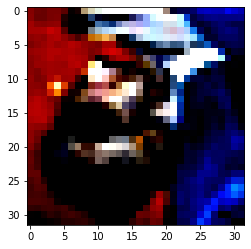

In [108]:
# 3 in cifar-10
plt.imshow(testset[0][0].permute(2,1,0))
print(testset[0][1])

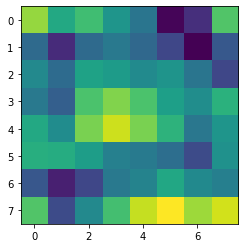

In [150]:
dense10_cifar.cuda()
result = LayerResult(dense10_cifar)

dense10_cifar(testset[0][0].unsqueeze(0).cuda())
activations = result.features
plt.imshow(activations.squeeze().sum(axis=0))

5


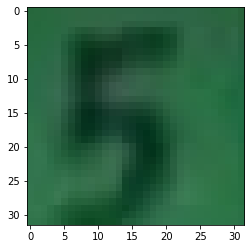

In [125]:
plt.imshow(np.array(_test_ds[0][0]))
print(_test_ds[0][1])

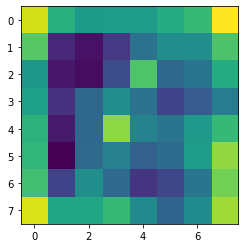

In [146]:
plt.imshow(activations.squeeze().sum(axis=0))

2


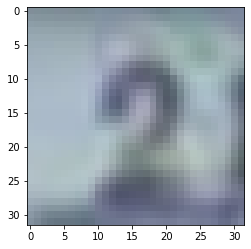

In [147]:
plt.imshow(np.array(_test_ds[1][0]))
print(_test_ds[1][1])

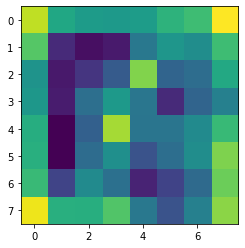

In [167]:
dense10_svhn.cuda()
result = LayerResult(dense10_svhn)

dense10_svhn(test_ds[0][0].unsqueeze(0).cuda())
activations = result.features
plt.imshow(activations.squeeze().sum(axis=0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


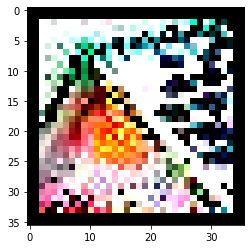

In [163]:
plt.imshow(testsetout[0][0].permute(1,2,0))

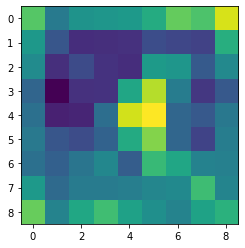

In [164]:
dense10_svhn.cuda()
result = LayerResult(dense10_svhn)

dense10_svhn(testsetout[0][0].unsqueeze(0).cuda())
activations = result.features
plt.imshow(activations.squeeze().sum(axis=0))

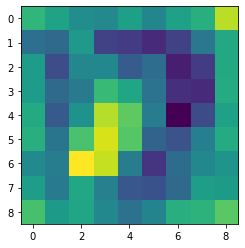

In [165]:
dense10_svhn(testsetout[1][0].unsqueeze(0).cuda())
activations = result.features
plt.imshow(activations.squeeze().sum(axis=0))

`testlodaerIn == testlodaer10 == Cifar-10`

`length == 10000 && batch_size == 1, image 한장과 정답레이블 한개가 같이 내재`

In [19]:
for j, data in enumerate(testloaderIn):
    display(j)
    display(type(data))
    break

0

list

# End of Little Lab

# 딥러닝 코딩 step by step

## step1. 데이터 전처리 
1. `sklearn.model_selection.train_test_split` 메소드를 이용하여 train, val, test 분리
     - 필요에 따라 `torch.utils.data.Dataset`을 상속(필수 overriding: `__init__`, `__len__`, `__getitem__`)하여 custom dataset을 만들어야 한다. 
2. `torch.utils.data.DataLoader`를 이용하여 mini batch 호출을 정의한다.
3. `model` 정의: 원하는 모델을 만들기(classifier든, detection이든, segmentation이든)

In [6]:
from torch.utils.data import Dataset

class svhnDataset(Dataset):
    def __init__(self, data, transform=None):
        super(svhnDataset, self).__init__()
        self.img_list = []
        self.label_list = []
        for data_pair in data:
            self.img_list.append(data_pair[0])
            self.label_list.append(data_pair[1])
            
        self.transform = transform
    
    def __len__(self):
        return len(self.img_list)
    
    def __getitem__(self, idx):
        image = self.img_list[idx]
        label = self.label_list[idx]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

In [154]:
import torch
import torchvision 
from torchvision import transforms

path2data = '/home/mydir/data'

train_transform =transforms.Compose([
    transforms.RandomCrop(28, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((125.3/255, 123.0/255, 113.9/255), (63.0/255, 62.1/255.0, 66.7/255.0)),
    transforms.Resize(32)
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((125.3/255, 123.0/255, 113.9/255), (63.0/255, 62.1/255.0, 66.7/255.0)),
    transforms.Resize(32)
])

_train_ds = datasets.SVHN(root=path2data, split='train', download=True)
_test_ds = datasets.SVHN(root=path2data, split='test', download=True)

train_ds = svhnDataset(data=_train_ds, transform=train_transform)
test_ds = svhnDataset(data=_test_ds, transform=test_transform)

  0%|          | 0/182040794 [00:00<?, ?it/s]

Using downloaded and verified file: /home/mydir/data/test_32x32.mat


In [215]:
from torch.utils.data import DataLoader
BATCH_SIZE = 128

trainloaderSVHN = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last = False)
testloaderSVHN = DataLoader(test_ds, batch_size=1, shuffle=False, drop_last = False)

In [353]:
path2model = './odin/models/'
model_name = 'densenet10.pth'
dense10_cifar = torch.load(path2model+model_name)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute o

In [341]:
# check whether the model do inference well or not
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x = torch.randn((3, 3, 32, 32)).to(device)
# check MODEL
model = dense10_cifar.to(device)
output_Stem = model(x)
print('Input size:', x.size())
print('Stem output size:', output_Stem.size())

Input size: torch.Size([3, 3, 32, 32])
Stem output size: torch.Size([3, 10])


pretrained model `densenet10.pth`가 pytorch 버전 문제인지 일부 기능이 안된다. `print(densenet10)`을 실행하면 `KeyError: 'track_running_stats`라는 error를 낸다.

In [354]:
# version 차이 때문인지, 아래와 같은 오류가 발생.
# AttributeError: 'BatchNorm2d' object has no attribute 'track_running_stats'`
# AttributeError: 'BatchNorm2d' object has no attribute 'num_batches_tracked'`
# 주어진 model 내의 BatchNorm2d module의 위의 속성들을 True로 바꿈으로써 해결 가능
def recursion_change_bn(module):
    if isinstance(module, torch.nn.BatchNorm2d):
        module.track_running_stats = True
        module.num_batches_tracked = True
    else:
        for i, (name, module1) in enumerate(module._modules.items()):
            module1 = recursion_change_bn(module1)
            
recursion_change_bn(dense10_cifar)

### `change_bn`의 작동 원리가 뭘까?
`module._modules`는 무엇일까?

In [14]:
def recursion_change_bn(module):
    if isinstance(module, torch.nn.BatchNorm2d):
        module.track_running_stats = True
#         module.num_batches_tracked = True
    else:
        for i, (name, module1) in enumerate(module._modules.items()):
            module1 = recursion_change_bn(module1)
            
recursion_change_bn(dense10_cifar)

In [15]:
len(dense10_cifar._modules)#.items())

9

### End of `change_bn`
---

In [356]:
import time

EPOCHS = 200
DEVICE = None

DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"DEVICE : {DEVICE}")

model = dense10_cifar.to(DEVICE)
optimizer = torch.optim.SGD(dense10_cifar.parameters(), lr=0.01, momentum=0.5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)
criterion = torch.nn.CrossEntropyLoss(reduction='sum')

def train(model, train_loader, val_loader, topk=3):
    
    model = model.to(DEVICE)

    start = int(time.time())
    result_dict = {'EPOCH':[], 'Train Loss':[], 'Train Top 1 Acc':[], 'Train Top k Acc':[], 'Val Loss':[], 'Val Top 1 Acc':[], 'Val Top k Acc':[], 'Time':[]}
    for epoch in range(1, EPOCHS + 1):
        
        train_loss, train_top1_acc, train_topk_acc = _train(model, train_loader, topk=topk)
        scheduler.step()
        val_loss, val_top1_acc, val_topk_acc = _evaluate(model, val_loader, topk=topk)
        if epoch % 50 == 0:
            torch.save(model, '../models/densenet10_svhn_epoch'+str(epoch))
        cur_time = int(time.time())
        overtime = cur_time - start # the type of `time` is float
#         print(f'Epoch: {epoch:>3}/{EPOCHS}  Train Loss: {train_loss:.3f}  Train Top 1 Acc: {train_top1_acc:.2f}%  Val Loss: {val_loss:.3f}  Val Top 1 Acc: {val_top1_acc:.2f}%')
#         print(f'                                   Train Top 3 Acc: {train_topk_acc:.2f}%                   Val Top 3 Acc: {val_topk_acc:.2f}%   Overtime: {overtime//3600:>2}H {(overtime//60)%60:>2}M {overtime%60:>2}S')
        result_dict['EPOCH'].append(epoch)
        result_dict['Train Loss'].append(train_loss)
        result_dict['Train Top 1 Acc'].append(train_top1_acc)
        result_dict['Train Top k Acc'].append(train_topk_acc)
        result_dict['Val Loss'].append(val_loss)
        result_dict['Val Top 1 Acc'].append(val_top1_acc)
        result_dict['Val Top k Acc'].append(val_topk_acc)
        result_dict['Time'].append(overtime)
    return result_dict

def _train(model, train_loader, topk=3):
    model.train()
    train_loss = 0
    correct_top1 = 0
    correct_topk = 0
    
    for image, label in train_loader:
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()               # global `optimizer`(gredient descent method)
        pred_proba = model(image)
        loss = criterion(pred_proba, label) # global `criterion`(loss function)
        loss.backward()
        optimizer.step()
        # cummulative sum of loss
        train_loss += loss.item()
        # the number of correct top1 prediction
        top1_pred = pred_proba.max(1, keepdim=True)[1]
        correct_top1 += top1_pred.eq(label.view_as(top1_pred)).sum().item()
        # the number of correct topk prediction
        topk_pred = pred_proba.topk(k=topk, dim=1)[1] # len == 2인 tensor인데, index == 0에는 sorted topk proba가 있다.
        correct_topk += topk_pred.eq(label.view(-1, 1).expand_as(topk_pred)).sum().item()
        
    train_loss /= len(train_loader.dataset)
    top1_accuracy = 100. * correct_top1 / len(train_loader.dataset)
    topk_accuracy = 100. * correct_topk / len(train_loader.dataset)
    return train_loss, top1_accuracy, topk_accuracy

def _evaluate(model, val_loader, topk=3):
    model.eval() # using this, the dropouts turn off
    val_loss = 0
    correct_top1 = 0
    correct_topk = 0
    
    with torch.no_grad(): # turn of auto-tracking of gradient
        for image, label in val_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            pred_proba = model(image)
            # cummulative sum of loss
            val_loss += criterion(pred_proba, label).item()
            # the number of correct top1 prediction
            top1_pred = pred_proba.max(1, keepdim=True)[1]
            correct_top1 += top1_pred.eq(label.view_as(top1_pred)).sum().item()
            # the number of correct topk prediction
            topk_pred = pred_proba.topk(k=topk, dim=1)[1]
            correct_topk += topk_pred.eq(label.view(-1, 1).expand_as(topk_pred)).sum().item()
            
    val_loss /= len(val_loader.dataset)
    top1_accuracy = 100. * correct_top1 / len(val_loader.dataset)
    topk_accuracy = 100. * correct_topk / len(val_loader.dataset)
    return val_loss, top1_accuracy, topk_accuracy

DEVICE : cuda


### Start of Experiments
---
#### 아래 셀들은 model의 `callable 함수의 output`과 `loss 함수의 output` 이 어떤 것인지 확인하는 실험과 top-k error에 대한 실험이다.


In [250]:
DEVICE = 'cuda'
optimizer = torch.optim.SGD(dense10_cifar.parameters(), lr=0.01, momentum=0.5)
criterion1 = nn.CrossEntropyLoss()
criterion2 = nn.CrossEntropyLoss(reduction='sum')

dense10_cifar.train()
train_loss = 0
correct_top1 = 0
correct_top5 = 0

prediction = None
loss_variable1 = None
loss_varaibel2 = None
label = None

for batch_idx, (image, label) in enumerate(train_loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()
    prediction = model(image)
    loss_variable1 = criterion1(prediction, label)
    loss_variable2 = criterion2(prediction, label)
    
    loss_variable1.backward()
    optimizer.step()
    
    break

##### 아래와 같은 방식으로 top 1 predictioin value에 접근 가능

In [166]:
pred = output.argmax(1, keepdim=True)
# 또는
pred = output.max(1, keepdim=True)[1]

tensor(18.8109, device='cuda:0', grad_fn=<MaxBackward1>)

model의 callable method의 output은 `torch.Tensor`이다. `torch.Tensor.max()`, `torch.Tensor.argmas()` 모두 첫번째 parameter는 `dim`이다. ~~이것이 무엇을 의미하는지 정확히 모르겠다.~~ `dim`은 `max`(또는 `argmax`)가 적용될 tensor의 차원의 index를 의미한다. 즉, 해당 차원 방향으로 max value 또는 max index를 찾는 것이다.<br>
두번째 parameter는 `keepdim`으로 `bool` type이다. default는 `False`이다. `True`이면 해당 input tensor를 그대로 유지한 채로 return한다.
`max()` mothod는 tuple을 return하는데, 첫번째 값에는 `tensro of max value`가, 두번째 값에는 `tensor of index of max value`가 저장된다.
<br><br>
Appendix: input의 형태가 [A,B,C,D]라고 할 때
dim=n 이라고 하면 n번째를 제외한 output이 나오게 되고
ex) dim = 2, C가 빠져 [A,B,D]가 나오게 된다.
이 C에 해당하는 데이터를 기준으로 최대값 및 인덱스가 튜플로 나오게 된다.
```
--------------------Example--------------------
INPUT : 
tensor([[[3, 4, 2, 0, 3],
         [0, 4, 0, 3, 0],
         [2, 0, 4, 3, 3],
         [1, 3, 3, 0, 4]],

        [[0, 3, 4, 2, 0],
         [0, 3, 4, 0, 2],
         [4, 0, 3, 2, 2],
         [3, 1, 1, 0, 1]],

        [[3, 4, 3, 0, 2],
         [2, 4, 1, 3, 1],
         [4, 0, 1, 1, 4],
         [4, 4, 1, 1, 0]]])
dim=2
torch.return_types.max(
values=tensor([[4, 4, 4, 4],
        [4, 4, 4, 3],
        [4, 4, 4, 4]]),
indices=tensor([[1, 1, 2, 4],
        [2, 2, 0, 0],
        [1, 1, 0, 0]]))
dim=1
torch.return_types.max(
values=tensor([[3, 4, 4, 3, 4],
        [4, 3, 4, 2, 2],
        [4, 4, 3, 3, 4]]),
indices=tensor([[0, 0, 2, 1, 3],
        [2, 0, 0, 0, 1],
        [2, 0, 0, 1, 2]]))
dim=0
torch.return_types.max(
values=tensor([[3, 4, 4, 2, 3],
        [2, 4, 4, 3, 2],
        [4, 0, 4, 3, 4],
        [4, 4, 3, 1, 4]]),
indices=tensor([[0, 0, 1, 1, 0],
        [2, 0, 1, 0, 1],
        [1, 0, 0, 0, 2],
        [2, 2, 0, 2, 0]]))
dim= -1
torch.return_types.max(
values=tensor([[4, 4, 4, 4],
        [4, 4, 4, 3],
        [4, 4, 4, 4]]),
indices=tensor([[1, 1, 2, 4],
        [2, 2, 0, 0],
        [1, 1, 0, 0]]))
```

#### 다음으로 loss function `criterion`의 output에 대해 알아보자

여전히 `torch.Tensor`이다. 다만, `grad_fn`이라는 속성이 다르다. 해당 속성이 무엇을 의미하는지는 아직 모르겠지만, loss function의 output tensor는 이 속성덕분에 `backward()`가 가능한 것 같다.

In [228]:
loss_variable1

7.324499130249023

In [229]:
loss_variable1.item() * 128

937.535888671875

In [230]:
loss_variable2.item()

937.535888671875

loss function은 default로 입력으로 받은 batch의 평균 loss를 반환한다(파라미터 중 하나인 `reduction`이 `reduction='mean'`이기때문). 미니배치 평균 loss들의 평균은 전체 batch의 평균 loss와 다르다. 따라서 전체 배치의 loss합산에 batch size(위 코드에서는 `len(train_loader.dataset)`로 구할 수 있음)로 나눠주는 것이 진정 평균 loss이다. 

#### About top-5 error

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FKiVxY%2Fbtq4wvikM2O%2FwKfU8cCTahrZzQlsYuTk2k%2Fimg.png'>

In [255]:
prediction[0:2]

tensor([[-0.8047, -2.2865,  1.6786, -1.5653,  3.0456, -2.6758,  6.6618, -1.9233,
         -5.7986,  3.6604],
        [-3.0336,  1.3451,  0.8680, -0.2392,  2.8278, -2.3174,  1.4950, -3.9047,
         -2.1566,  5.1090]], device='cuda:0', grad_fn=<SliceBackward>)

In [280]:
topk_pred = prediction[0:2].topk(k=7, dim=1)
display(topk_pred)

torch.return_types.topk(values=tensor([[ 6.6618,  3.6604,  3.0456,  1.6786, -0.8047, -1.5653, -1.9233],
        [ 5.1090,  2.8278,  1.4950,  1.3451,  0.8680, -0.2392, -2.1566]],
       device='cuda:0', grad_fn=<TopkBackward>), indices=tensor([[6, 9, 4, 2, 0, 3, 7],
        [9, 4, 6, 1, 2, 3, 8]], device='cuda:0'))

In [271]:
topk_pred.eq(label[0:2].view(-1, 1).expand_as(topk_pred))

tensor([[False, False, False, False, False,  True, False],
        [False, False, False, False, False, False,  True]], device='cuda:0')

In [273]:
topk_pred.eq(label[0:2].view(-1, 1).expand_as(topk_pred)).sum()

tensor(2, device='cuda:0')

In [274]:
topk_pred.eq(label[0:2].view(-1, 1).expand_as(topk_pred)).sum().item()

2

### End of Experiments
---

In [ ]:
result_dict = train(model, train_loader, test_loader)

In [373]:
import pandas as pd
pd.DataFrame(result_dict).to_csv('dense10_svhn_training_history.csv', index=False)
result_df = pd.read_csv('dense10_svhn_training_history.csv')
display(result_df)

,EPOCH,Train Loss,Train Top 1 Acc,Train Top k Acc,Val Loss,Val Top 1 Acc,Val Top k Acc,Time
0,1,2.273483,18.578429,44.375282,2.226622,19.587431,46.550400,81
1,2,2.128706,23.287877,50.123538,1.888511,26.720959,63.929010,163
2,3,1.095759,62.746222,86.348062,1.119816,69.149508,87.234942,246
3,4,0.539728,83.174304,95.013446,0.723782,76.329133,93.853719,328
4,5,0.446809,86.014988,95.951240,0.532208,83.090043,95.440227,411
...,...,...,...,...,...,...,...,...
195,196,0.038833,98.671799,99.931747,0.316018,93.696220,98.413491,16184
196,197,0.037876,98.716846,99.930382,0.305350,93.980486,98.413491,16267
197,198,0.037555,98.749608,99.916732,0.319139,93.607867,98.436540,16349
198,199,0.036705,98.775544,99.923557,0.319001,93.788414,98.340504,16431


In [367]:
for i in range(200):
    result_sr = result_df.iloc[i]
    epoch = int(result_sr['EPOCH'])
    train_loss = result_sr['Train Loss']
    train_top1_acc = result_sr['Train Top 1 Acc']
    train_topk_acc = result_sr['Train Top k Acc']
    val_loss = result_sr['Val Loss']
    val_top1_acc = result_sr['Val Top 1 Acc']
    val_topk_acc = result_sr['Val Top k Acc']
    overtime = int(result_sr['Time'])
    print(f'Epoch: {epoch:>3}/{EPOCHS}  Train Loss: {train_loss:.3f}  Train Top 1 Acc: {train_top1_acc:.2f}%  Val Loss: {val_loss:.3f}  Val Top 1 Acc: {val_top1_acc:.2f}%')
    print(f'                                   Train Top 3 Acc: {train_topk_acc:.2f}%                   Val Top 3 Acc: {val_topk_acc:.2f}%   Overtime: {overtime//3600:>2}H {(overtime//60)%60:>2}M {overtime%60:>2}S')

Epoch:   1/200  Train Loss: 2.273  Train Top 1 Acc: 18.58%  Val Loss: 2.227  Val Top 1 Acc: 19.59%
                                   Train Top 3 Acc: 44.38%                   Val Top 3 Acc: 46.55%   Overtime:  0H  1M 21S
Epoch:   2/200  Train Loss: 2.129  Train Top 1 Acc: 23.29%  Val Loss: 1.889  Val Top 1 Acc: 26.72%
                                   Train Top 3 Acc: 50.12%                   Val Top 3 Acc: 63.93%   Overtime:  0H  2M 43S
Epoch:   3/200  Train Loss: 1.096  Train Top 1 Acc: 62.75%  Val Loss: 1.120  Val Top 1 Acc: 69.15%
                                   Train Top 3 Acc: 86.35%                   Val Top 3 Acc: 87.23%   Overtime:  0H  4M  6S
Epoch:   4/200  Train Loss: 0.540  Train Top 1 Acc: 83.17%  Val Loss: 0.724  Val Top 1 Acc: 76.33%
                                   Train Top 3 Acc: 95.01%                   Val Top 3 Acc: 93.85%   Overtime:  0H  5M 28S
Epoch:   5/200  Train Loss: 0.447  Train Top 1 Acc: 86.01%  Val Loss: 0.532  Val Top 1 Acc: 83.09%
             

In [374]:
dense10_svhn = torch.load('./odin/models/densenet10_svhn.pth')

In [375]:
_evaluate(model=dense10_svhn,topk=3, val_loader=test_loader)

(0.31109534664687455, 94.07652120467118, 98.50568531038722)

In [389]:
'''cal.py copied'''
from __future__ import print_function
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import time
from scipy import misc
import calMetric as m
import calData as d
#CUDA_DEVICE = 0

start = time.time()
#loading data sets

transform = transforms.Compose([
    transforms.ToTensor(),
    # `Normalize` is the class which normalize data channelwise by the given mean and std.
    # In this case, the number of input channels is 3 because the lenght of the iterable object is 3.
    # Ref: https://pytorch.org/vision/stable/transforms.html
    # Ref of various image normalizing: https://stackoverflow.com/questions/33610825/normalization-in-image-processing
    transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614)),
    transforms.Resize(32)
])




# loading neural network

# Name of neural networks
# Densenet trained on CIFAR-10:         densenet10
# Densenet trained on CIFAR-100:        densenet100
# Densenet trained on WideResNet-10:    wideresnet10
# Densenet trained on WideResNet-100:   wideresnet100
#nnName = "densenet10"

#imName = "Imagenet"



criterion = nn.CrossEntropyLoss()



def test(nnName, dataName, CUDA_DEVICE, epsilon, temperature):
    
    net1 = torch.load("../models/{}.pth".format(nnName))
    optimizer1 = optim.SGD(net1.parameters(), lr = 0, momentum = 0)
    net1.cuda(CUDA_DEVICE)
    
    # We suppose the out-of distribution data is `Uniform` or `Gaussian`. 
    # If you do not, we call the data as `testsetout`.
    if dataName != "Uniform" and dataName != "Gaussian":
        testsetout = torchvision.datasets.ImageFolder("../data/{}".format(dataName), transform=transform)
        testloaderOut = torch.utils.data.DataLoader(testsetout, batch_size=1,
                                         shuffle=False, num_workers=2)
        
    # OOD 성능을 평가할 때는 고정되어야 하는 것들이 있다.
    # 적어도 같은 모델이어야 하고 같은 데이터이어야 한다(in dist & out-of dist 모두). (이것도 하이퍼 파라미터라고 볼 수 있을까?)
    # 그래야 OOD 방법론에 대한 정량적인 평가가 가능하기때문.
    if nnName == "densenet10" or nnName == "wideresnet10": 
        testset = torchvision.datasets.CIFAR10(root='../data', train=False, download=True, transform=transform)
        testloaderIn = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=2)
        
    if nnName == "densenet100" or nnName == "wideresnet100": 
        testset = torchvision.datasets.CIFAR100(root='../data', train=False, download=True, transform=transform)
        testloaderIn = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=2)
    if nnName == "densenet10_svhn":
        testset = torchvision.datasets.SVHN(root='../data', split='test', download=True, transform=transform)
        testloaderIn = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=2)
    
    if dataName == "Gaussian":
        d.testGaussian(net1, criterion, CUDA_DEVICE, testloaderIn, testloaderIn, nnName, dataName, epsilon, temperature)
        m.metric(nnName, dataName)

    elif dataName == "Uniform":
        d.testUni(net1, criterion, CUDA_DEVICE, testloaderIn, testloaderIn, nnName, dataName, epsilon, temperature)
        m.metric(nnName, dataName)
        
    else:
        d.testData(net1, criterion, CUDA_DEVICE, testloaderIn, testloaderOut, nnName, dataName, epsilon, temperature) 
        m.metric(nnName, dataName)


In [6]:
import  cal as c
c.test('densenet10_svhn', 'Imagenet', 0, 0.0014, 1000) # 첫번째 인자는 모델명, 두번째 인자는 ood dataset의 이름, 세번째는 # gpu

Using downloaded and verified file: ../data/test_32x32.mat
Processing in-distribution images


/home/mydir/dn2ood/odin/code/calData.py:72: UserWarning: This overload of add is deprecated:
	add(Tensor input, Number alpha, Tensor other, *, Tensor out)
Consider using one of the following signatures instead:
	add(Tensor input, Tensor other, *, Number alpha, Tensor out) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:1025.)
  tempInputs = torch.add(inputs.data,  -noiseMagnitude1, gradient)


 100/9000 images processed, 4.8 seconds used.
 200/9000 images processed, 4.0 seconds used.
 300/9000 images processed, 4.0 seconds used.
 400/9000 images processed, 4.0 seconds used.
 500/9000 images processed, 4.0 seconds used.
 600/9000 images processed, 4.0 seconds used.
 700/9000 images processed, 4.0 seconds used.
 800/9000 images processed, 4.0 seconds used.
 900/9000 images processed, 4.0 seconds used.
1000/9000 images processed, 4.0 seconds used.
1100/9000 images processed, 4.0 seconds used.
1200/9000 images processed, 4.0 seconds used.
1300/9000 images processed, 4.0 seconds used.
1400/9000 images processed, 4.0 seconds used.
1500/9000 images processed, 4.0 seconds used.
1600/9000 images processed, 4.0 seconds used.
1700/9000 images processed, 4.0 seconds used.
1800/9000 images processed, 4.0 seconds used.
1900/9000 images processed, 4.0 seconds used.
2000/9000 images processed, 4.0 seconds used.
2100/9000 images processed, 4.0 seconds used.
2200/9000 images processed, 4.0 se

In [7]:
c.test('densenet10', 'Imagenet_crop', 0, 0.0014, 1000)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute o

Files already downloaded and verified
Processing in-distribution images
 100/9000 images processed, 4.7 seconds used.
 200/9000 images processed, 4.0 seconds used.
 300/9000 images processed, 4.0 seconds used.
 400/9000 images processed, 4.0 seconds used.
 500/9000 images processed, 4.1 seconds used.
 600/9000 images processed, 4.2 seconds used.
 700/9000 images processed, 4.2 seconds used.
 800/9000 images processed, 4.2 seconds used.
 900/9000 images processed, 4.1 seconds used.
1000/9000 images processed, 4.1 seconds used.
1100/9000 images processed, 4.1 seconds used.
1200/9000 images processed, 4.1 seconds used.
1300/9000 images processed, 4.2 seconds used.
1400/9000 images processed, 4.2 seconds used.
1500/9000 images processed, 4.2 seconds used.
1600/9000 images processed, 4.2 seconds used.
1700/9000 images processed, 4.0 seconds used.
1800/9000 images processed, 4.0 seconds used.
1900/9000 images processed, 4.0 seconds used.
2000/9000 images processed, 4.0 seconds used.
2100/900

In [9]:
c.test('densenet10_svhn', 'Imagenet_resize', 0, 0.0014, 1000)

Using downloaded and verified file: ../data/test_32x32.mat
Processing in-distribution images
 100/9000 images processed, 4.8 seconds used.
 200/9000 images processed, 4.0 seconds used.
 300/9000 images processed, 4.0 seconds used.
 400/9000 images processed, 4.0 seconds used.
 500/9000 images processed, 4.0 seconds used.
 600/9000 images processed, 4.0 seconds used.
 700/9000 images processed, 4.0 seconds used.
 800/9000 images processed, 4.0 seconds used.
 900/9000 images processed, 4.0 seconds used.
1000/9000 images processed, 4.0 seconds used.
1100/9000 images processed, 4.0 seconds used.
1200/9000 images processed, 4.0 seconds used.
1300/9000 images processed, 4.0 seconds used.
1400/9000 images processed, 4.0 seconds used.
1500/9000 images processed, 4.0 seconds used.
1600/9000 images processed, 4.0 seconds used.
1700/9000 images processed, 4.0 seconds used.
1800/9000 images processed, 4.0 seconds used.
1900/9000 images processed, 4.0 seconds used.
2000/9000 images processed, 4.0 s

In [11]:
c.test('densenet10_svhn', 'LSUN_crop', 0, 0.0014, 1000)

Using downloaded and verified file: ../data/test_32x32.mat
Processing in-distribution images
 100/9000 images processed, 4.8 seconds used.
 200/9000 images processed, 4.0 seconds used.
 300/9000 images processed, 4.0 seconds used.
 400/9000 images processed, 4.0 seconds used.
 500/9000 images processed, 4.0 seconds used.
 600/9000 images processed, 4.0 seconds used.
 700/9000 images processed, 4.0 seconds used.
 800/9000 images processed, 4.0 seconds used.
 900/9000 images processed, 4.0 seconds used.
1000/9000 images processed, 4.0 seconds used.
1100/9000 images processed, 4.0 seconds used.
1200/9000 images processed, 4.0 seconds used.
1300/9000 images processed, 4.0 seconds used.
1400/9000 images processed, 4.0 seconds used.
1500/9000 images processed, 4.0 seconds used.
1600/9000 images processed, 4.0 seconds used.
1700/9000 images processed, 4.0 seconds used.
1800/9000 images processed, 4.0 seconds used.
1900/9000 images processed, 4.0 seconds used.
2000/9000 images processed, 4.0 s

UnboundLocalError: local variable 'dataName' referenced before assignment

In [1]:
import calMetric as m
m.metric('densenet10_svhn', 'LSUN_crop')

Neural network architecture:          DenseNet-BC-100
In-distribution dataset:                         SVHN
Out-of-distribution dataset:              LSUN (crop)

                          Baseline         Our Method
FPR at TPR 95%:              41.2%              31.1% 
Detection error:             13.2%              14.0%
AUROC:                       93.2%              92.9%
AUPR In:                     93.4%              92.1%
AUPR Out:                    91.8%              93.2%


In [3]:
import  cal as c
c.test('densenet10_svhn', 'LSUN_resize', 0, 0.0014, 1000) 

Using downloaded and verified file: ../data/test_32x32.mat
Processing in-distribution images


/home/mydir/dn2ood/odin/code/calData.py:72: UserWarning: This overload of add is deprecated:
	add(Tensor input, Number alpha, Tensor other, *, Tensor out)
Consider using one of the following signatures instead:
	add(Tensor input, Tensor other, *, Number alpha, Tensor out) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:1025.)
  tempInputs = torch.add(inputs.data,  -noiseMagnitude1, gradient)


 100/9000 images processed, 4.9 seconds used.
 200/9000 images processed, 4.0 seconds used.
 300/9000 images processed, 3.9 seconds used.
 400/9000 images processed, 4.0 seconds used.
 500/9000 images processed, 4.0 seconds used.
 600/9000 images processed, 4.0 seconds used.
 700/9000 images processed, 4.0 seconds used.
 800/9000 images processed, 4.0 seconds used.
 900/9000 images processed, 4.0 seconds used.
1000/9000 images processed, 3.9 seconds used.
1100/9000 images processed, 4.0 seconds used.
1200/9000 images processed, 4.0 seconds used.
1300/9000 images processed, 4.0 seconds used.
1400/9000 images processed, 4.0 seconds used.
1500/9000 images processed, 4.0 seconds used.
1600/9000 images processed, 4.0 seconds used.
1700/9000 images processed, 3.9 seconds used.
1800/9000 images processed, 4.0 seconds used.
1900/9000 images processed, 4.0 seconds used.
2000/9000 images processed, 4.0 seconds used.
2100/9000 images processed, 4.0 seconds used.
2200/9000 images processed, 4.0 se

In [4]:
c.test('densenet10_svhn', 'iSUN', 0, 0.0014, 1000) 

Using downloaded and verified file: ../data/test_32x32.mat
Processing in-distribution images
 100/7925 images processed, 4.8 seconds used.
 200/7925 images processed, 4.0 seconds used.
 300/7925 images processed, 4.0 seconds used.
 400/7925 images processed, 4.0 seconds used.
 500/7925 images processed, 4.0 seconds used.
 600/7925 images processed, 4.0 seconds used.
 700/7925 images processed, 4.0 seconds used.
 800/7925 images processed, 4.0 seconds used.
 900/7925 images processed, 4.0 seconds used.
1000/7925 images processed, 4.0 seconds used.
1100/7925 images processed, 4.0 seconds used.
1200/7925 images processed, 4.0 seconds used.
1300/7925 images processed, 4.0 seconds used.
1400/7925 images processed, 4.0 seconds used.
1500/7925 images processed, 4.0 seconds used.
1600/7925 images processed, 4.0 seconds used.
1700/7925 images processed, 4.0 seconds used.
1800/7925 images processed, 4.0 seconds used.
1900/7925 images processed, 4.0 seconds used.
2000/7925 images processed, 4.0 s

In [5]:
c.test('densenet10_svhn', 'Gaussian', 0, 0.0014, 1000) 

Using downloaded and verified file: ../data/test_32x32.mat
Processing in-distribution images
 100/9000 images processed, 4.7 seconds used.
 200/9000 images processed, 4.0 seconds used.
 300/9000 images processed, 4.0 seconds used.
 400/9000 images processed, 4.0 seconds used.
 500/9000 images processed, 4.0 seconds used.
 600/9000 images processed, 4.0 seconds used.
 700/9000 images processed, 4.0 seconds used.
 800/9000 images processed, 4.0 seconds used.
 900/9000 images processed, 4.0 seconds used.
1000/9000 images processed, 4.0 seconds used.
1100/9000 images processed, 4.0 seconds used.
1200/9000 images processed, 4.0 seconds used.
1300/9000 images processed, 4.0 seconds used.
1400/9000 images processed, 4.0 seconds used.
1500/9000 images processed, 4.0 seconds used.
1600/9000 images processed, 4.0 seconds used.
1700/9000 images processed, 4.0 seconds used.
1800/9000 images processed, 4.1 seconds used.
1900/9000 images processed, 4.2 seconds used.
2000/9000 images processed, 4.2 s

In [6]:
c.test('densenet10_svhn', 'Uniform', 0, 0.0014, 1000) 

Using downloaded and verified file: ../data/test_32x32.mat
Processing in-distribution images
 100/9000  images processed, 4.8 seconds used.
 200/9000  images processed, 4.0 seconds used.
 300/9000  images processed, 4.0 seconds used.
 400/9000  images processed, 4.0 seconds used.
 500/9000  images processed, 4.1 seconds used.
 600/9000  images processed, 4.1 seconds used.
 700/9000  images processed, 4.2 seconds used.
 800/9000  images processed, 4.1 seconds used.
 900/9000  images processed, 4.0 seconds used.
1000/9000  images processed, 4.0 seconds used.
1100/9000  images processed, 4.0 seconds used.
1200/9000  images processed, 4.0 seconds used.
1300/9000  images processed, 4.0 seconds used.
1400/9000  images processed, 4.0 seconds used.
1500/9000  images processed, 4.2 seconds used.
1600/9000  images processed, 4.3 seconds used.
1700/9000  images processed, 4.2 seconds used.
1800/9000  images processed, 4.1 seconds used.
1900/9000  images processed, 4.3 seconds used.
2000/9000  ima